In [5]:
import numpy as np
import matplotlib.pyplot as plt

def makeOneDecision(D,T,f):
    N_corr = 0
    N_wrong = 0
    
    for i in range(D*T):
        dot_direction = np.random.binomial(1,f)
        
        N_corr += dot_direction
        N_wrong += (1-dot_direction)
        
    if N_corr > N_wrong:
        accuracy = 1
    elif N_corr < N_wrong:
        accuracy = 0
    else:
        accuracy = np.random.binomial(1,0.5)
        
    return accuracy

def makeManyDecisions(D,T,f,nDecisions):
    
    accuracy_scores = np.zeros(nDecisions) 
    for i in range(nDecisions):
        accuracy_scores[i] = makeOneDecision(D,T,f)
        
    avg_accuracy = np.mean(accuracy_scores)
    return avg_accuracy

In [2]:
# Number of dots
D = 10
# Array of different frames
T_vals = np.array([1,6,11,16,21])
# Fraction of dots moving in screen
COH = np.array([3.2, 6.4, 12.8, 25.6, 51.2])/100
f_vals = (COH + 1)/2
# number of decisions
nDecisions = 1000

In [3]:
avg_scores = np.zeros((len(T_vals),len(f_vals)))

for i,T_value in enumerate(T_vals):
    for j,f_value in enumerate(f_vals):
        avg_scores[i,j] = makeManyDecisions(D, T_value, f_value, nDecisions)

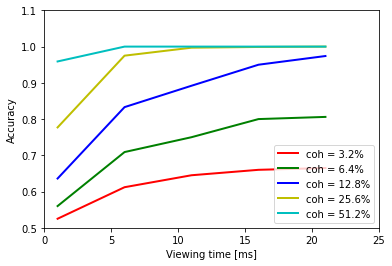

In [4]:
# Plot the model 
        
colors  = ['r','g','b','y','c']
Labels = ['coh = 3.2%', 'coh = 6.4%', 'coh = 12.8%', 'coh = 25.6%', 'coh = 51.2%']

fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(len(T_vals)):
    ax.plot(T_vals,avg_scores.T[i],color = colors[i], label = Labels[i],linewidth = '2')

ax.set_xlabel('Viewing time [ms]')
ax.set_ylabel('Accuracy')
ax.set_ylim(0.5,1.1)
ax.set_xlim(0,25)
ax.legend(loc='lower right')